## Lesson-01

In [2]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [3]:
another_grammar = """
# 
"""

In [4]:
import random

In [5]:
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [6]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [7]:
adj_star()

'蓝色的好看的'

## But the question is ? 

如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

In [8]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [9]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [10]:
grammar = create_grammar(simple_grammar)
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [11]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [12]:
example_grammar = create_grammar(simple_grammar)

In [13]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [14]:
generate(gram=example_grammar, target='sentence')

'这个篮球看着一个女人'

In [15]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [16]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

小朋友,你好我是191号,您需要打牌吗？
您好我是8211号,请问你要打猎吗？
小朋友,你好我是8号,请问你要喝酒吗？
您好我是11号,请问你要打猎吗？
女士,你好我是9号,您需要喝酒吗？
您好我是4号,您需要打猎吗？
你好我是1号,您需要打猎吗？
你好我是75号,您需要赌博吗？
女士,您好我是8652号,请问你要喝酒吗？
先生,您好我是18号,请问你要打牌吗？
女士,您好我是641969号,您需要打猎吗？
先生,你好我是3号,您需要喝酒吗？
你好我是3号,您需要赌博吗？
先生,你好我是3号,您需要喝酒吗？
女士,你好我是841号,您需要赌博吗？
女士,您好我是7号,您需要打猎吗？
女士,您好我是864号,您需要打猎吗？
女士,你好我是77392号,请问你要喝酒吗？
先生,您好我是3656号,您需要打牌吗？
你好我是6号,您需要赌博吗？


希望能够生成最合理的一句话？ 

## Data Driven

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [17]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [18]:
print(generate(gram=create_grammar(programming, split='=>'), target='stmt'))

while(databasestudent2){
....if(infodatabase2){
....while(database2){
....infostudent3=namecourse3}}}


# Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

In [272]:
import random

In [19]:
random.choice(range(100))

20

In [20]:
filename = '../datasource/sqlResult_1558435.csv'

In [21]:
import pandas as pd

In [22]:
content = pd.read_csv(filename, encoding='gb18030')

In [23]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [24]:
articles = content['content'].tolist()

In [25]:
len(articles)

89611

invalid

In [26]:
import re

In [27]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [28]:
from collections import Counter

In [30]:
import jieba
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\webberg\AppData\Local\Temp\jieba.cache
Loading model cost 1.134 seconds.
Prefix dict has been built succesfully.


In [31]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [42]:
''.join(token(articles[129]))

'自治区信访局干部冯玉是自治区第二批驻村工作队队员2016年11月她把4岁的女儿托付给婆婆后就收拾行囊作为首批3000名南疆学前双语支教干部之一来到了阿克苏地区温宿县克孜勒镇喀拉萨村此时离她结束驻村工作仅仅过去了八个月不知道为什么我就是舍不得村子还有这些孩子也许这就是缘分冯玉笑着说冯玉和孩子们在一起最后一公里IDMqMsMx记者段清宇通讯员刘广卿报道01忘在幼儿园的孩子第一天看到活泼可爱的孩子们冯玉就打心眼儿里喜欢他们为让孩子们能快点接纳自己她每天提前一小时等在校门前让上学的孩子们第一眼就能看见她支教第一天我有点懵这些新入学的孩子们显然对学校生活水土不服因为年龄太小没有离开过父母等原因教室里几乎没有一分钟是安静的哭喊声吵闹声不绝于耳还有不少孩子尿了裤子冯玉哭笑不得地说情况出乎我的意料之外虽说我也是一名母亲但面对一群不满4岁的孩子我顿时变得慌乱不知所措起来对冯玉来说面临的问题还远远不止这些无法与孩子们很好地交流沟通才是最大的困难她只能对着孩子们一边比划一边不停重复好在孩子们非常聪明经过短时间的磨合期就能与冯玉流畅地交流了给孩子们上课为培养孩子们讲究卫生的好习惯冯玉买回来两个水壶每天早晨从自治区信访局驻村工作队宿舍烧好热水后提到班里兑好水温并按照六步洗手法逐个教孩子们洗手感到新奇的孩子们一步步跟着冯玉做逐渐养成了习惯一天天下来孩子们的手越来越干净而冯玉的双手却开始变得粗糙被风吹出了裂口但她毫不在意有一次她刚要开始给孩子们上课突然发现门口站着一个拎着水壶的中年妇女冯玉以为是走错了班级中年妇女却满脸歉意地说冯老师我是热依拉夏克尔的妈妈不好意思啊我早晨有些忙忘记给孩子洗手了热依拉的妈妈认认真真给孩子洗了手后才离开看着她的背影冯玉觉得没有什么时候比那一刻更有成就感了有这样细心的妈妈自然也有粗心的妈妈冯玉经常会遇到有家长粗心忘记接孩子通常此时她会将最后留下的几个孩子带回宿舍先给孩子们做些好吃的再陪他们讲故事做游戏02她是值得信赖和托付的人阿卜力米提阿卜啦的爷爷一开始有点担心怕城市里来的老师们照顾不好自己的孙子但一件事让他改变了对支教老师的态度那是开学后的第三天阿卜力米提的爷爷把孙子送到教室后并没有马上离开而是在窗外观察了半个小时彼时孩子们都是刚刚被父母送到教室不少小家伙正闹着小脾气不依不饶地要妈妈教室里乱作一团可教师们并不忙乱只见冯玉有条不紊地一边抱起正在哭闹的阿卜力米提就像他的

In [43]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [44]:
len(articles_clean)

89611

In [45]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [47]:
!dir

 驱动器 E 中的卷是 新加卷
 卷的序列号是 7C4E-8600

 E:\code\NLP\NLPHomework\Assignment-01 的目录

2019/06/30  22:25    <DIR>          .
2019/06/30  22:25    <DIR>          ..
2019/06/30  22:00    <DIR>          .ipynb_checkpoints
2019/06/30  21:37    <DIR>          .vs
2019/06/30  21:34             1,447 1.py
2019/06/30  21:40               307 2.txt
2019/06/30  22:01               863 5.0.txt
2019/06/30  21:41                 0 5.py
2019/06/30  22:25        64,368,892 article_9k.txt
2019/06/30  22:24            69,931 Lesson-01.ipynb
               6 个文件     64,441,440 字节
               4 个目录 170,819,166,208 可用字节


In [48]:
def cut(string): return list(jieba.cut(string))

In [15]:
import jieba

In [49]:
def cut(string): return list(jieba.cut(string))

In [50]:
TOKEN = []

In [51]:
for i, line in enumerate((open('article_9k.txt'))):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 10000: break    
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [52]:
from functools import reduce

In [53]:
from operator import add, mul

In [54]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [55]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

In [56]:
from collections import Counter

In [57]:
words_count = Counter(TOKEN)

In [58]:
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

In [59]:
frequiences = [f for w, f in words_count.most_common(100)]

In [60]:
x = [i for i in range(100)]

In [61]:
%matplotlib inline

In [62]:
import matplotlib.pyplot as plt

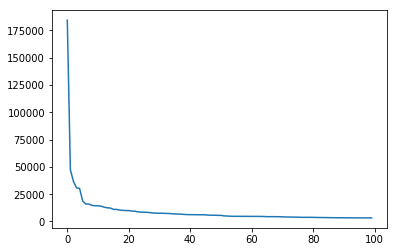

In [63]:
plt.plot(x, frequiences)

In [64]:
import numpy as np

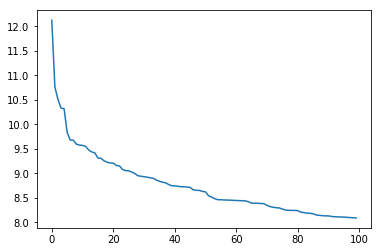

In [65]:
plt.plot(x, np.log(frequiences))

In [66]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [67]:
prob_1('我们')

0.001554473157589251

In [68]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [69]:
TOKEN = [str(t) for t in TOKEN]

In [70]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [71]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [72]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [73]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [74]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [75]:
prob_2('我们', '在')

4.683455274626447e-05

In [76]:
prob_2('在', '吃饭')

2.707199580708929e-07

In [77]:
prob_2('去', '吃饭')

2.707199580708929e-07

In [78]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [81]:
get_probablity('小明今天抽奖抽到台苹果手机')

6.298565169317442e-39

In [82]:
get_probablity('小明今天抽奖抽到三架波音飞机')

3.936603230823401e-40

In [83]:
get_probablity('洋葱奶昔来一杯')

1.9840875058382383e-20

In [84]:
get_probablity('养乐多绿来一杯')

7.3289295697906e-14

In [85]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个桌子坐在这个篮球 with Prb: 5.371320863895103e-27
sentence: 这个蓝色的女人听着一个好看的女人 with Prb: 1.5954023112367895e-52
sentence: 一个小小的小小的蓝色的好看的好看的女人看见这个女人 with Prb: 5.220329193045573e-74
sentence: 一个桌子看见一个蓝色的女人 with Prb: 1.8265838991020584e-37
sentence: 这个桌子看着这个女人 with Prb: 2.1485283455580413e-26
sentence: 这个蓝色的篮球看见一个蓝色的桌子 with Prb: 1.3294581268799156e-49
sentence: 这个小猫看见一个篮球 with Prb: 1.0742641727790206e-26
sentence: 这个篮球看着这个蓝色的蓝色的小猫 with Prb: 4.0622331654664095e-50
sentence: 这个蓝色的小猫看着一个桌子 with Prb: 3.149282584658721e-39
sentence: 这个小小的蓝色的篮球看见一个篮球 with Prb: 1.5346325686899637e-44


In [86]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.7051133711305114e-62
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.7051133711305114e-62
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.599536134964894e-32
---- 真是一只好看的小猫 with probility 5.908452950284614e-26
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 8.333167524520602e-19
---- 今晚火锅去吃我 with probility 1.933675511002237e-25
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.9840875058382383e-20
---- 养乐多绿来一杯 with probility 7.3289295697906e-14


## Data Driven